In [1]:
import pandas as pd

df = pd.read_csv('shopping-data.csv')

x = df.drop(columns=['CustomerID'])
x.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [2]:
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler(feature_range=(1,99))

data_scaler.fit(x)

tx = data_scaler.transform(x)
print(tx)

x['Income'] = tx[:,0]
x['Score'] = tx[:,1]

[[ 1.         39.        ]
 [ 1.         81.        ]
 [ 1.80327869  6.        ]
 [ 1.80327869 77.        ]
 [ 2.60655738 40.        ]
 [ 2.60655738 76.        ]
 [ 3.40983607  6.        ]
 [ 3.40983607 94.        ]
 [ 4.21311475  3.        ]
 [ 4.21311475 72.        ]
 [ 4.21311475 14.        ]
 [ 4.21311475 99.        ]
 [ 5.01639344 15.        ]
 [ 5.01639344 77.        ]
 [ 5.01639344 13.        ]
 [ 5.01639344 79.        ]
 [ 5.81967213 35.        ]
 [ 5.81967213 66.        ]
 [ 7.42622951 29.        ]
 [ 7.42622951 98.        ]
 [ 8.2295082  35.        ]
 [ 8.2295082  73.        ]
 [ 9.03278689  5.        ]
 [ 9.03278689 73.        ]
 [11.44262295 14.        ]
 [11.44262295 82.        ]
 [11.44262295 32.        ]
 [11.44262295 61.        ]
 [12.24590164 31.        ]
 [12.24590164 87.        ]
 [13.04918033  4.        ]
 [13.04918033 73.        ]
 [15.45901639  4.        ]
 [15.45901639 92.        ]
 [15.45901639 14.        ]
 [15.45901639 81.        ]
 [16.26229508 17.        ]
 

In [3]:
x

,Annual Income (k$),Spending Score (1-100),Income,Score
0,15,39,1.000000,39.0
1,15,81,1.000000,81.0
2,16,6,1.803279,6.0
3,16,77,1.803279,77.0
4,17,40,2.606557,40.0
...,...,...,...,...
195,120,79,85.344262,79.0
196,126,28,90.163934,28.0
197,126,74,90.163934,74.0
198,137,18,99.000000,18.0


In [4]:
from sklearn.cluster import KMeans

x = x[['Income','Score']]

from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
max_silhouette_score = 0
best_n_clusters = 0
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters = n_clusters)
    model.fit(x)
    silhouette_avg = silhouette_score(x, model.labels_)
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", round(silhouette_avg,2),)
print("Best n_cluster= ",best_n_clusters, " with silhouette score= ", round(max_silhouette_score,2))

c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.33


c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.45


c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5


c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.56


c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.54


c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.52


c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.43
Best n_cluster=  5  with silhouette score=  0.56


In [5]:
n_clusters = best_n_clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(x)

c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohbc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

NameError: name 'xcenter' is not defined

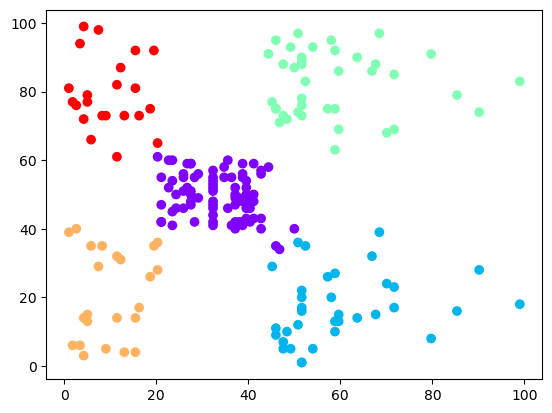

In [6]:
import matplotlib.pyplot as plt

x1 = x['Income']
x2 = x['Score']

plt.scatter(x1,x2, c=kmeans.labels_, cmap='rainbow')

xCenters = kmeans.cluster_centers_[:,0]
yCenters = kmeans.cluster_centers_[:,1]

plt.scatter(xcenter, ycenter, color='black')

for i in range(best_n_clusters): # this for loop puts the numbers of the sets on the graph
    plt.annotate(i, xy=(xCenters[i], yCenters[i]), textcoords='offset points', xytext=(10,10))
    
plt.show()

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['CustomerID'] = df['CustomerID']

cluster_map['cluster'] = kmeans.labels_
cluster_map[cluster_map.cluster==2]

,CustomerID,cluster
123,124,2
125,126,2
127,128,2
129,130,2
131,132,2
133,134,2
135,136,2
137,138,2
139,140,2
141,142,2
